# Official master's degree in High Energy Physics, Astrophysics and Cosmology

## <img width=400 src="https://upload.wikimedia.org/wikipedia/commons/1/1a/NumPy_logo.svg" alt="Numpy"/>

## <img width=400 src="https://raw.githubusercontent.com/pandas-dev/pandas/4a31802c42b3c1acab7dd47f59035e50510735d9/web/pandas/static/img/pandas.svg" alt="Pandas"/>

In [1]:
from IPython.display import display, HTML

display(HTML("""
<style>
/* Classic Notebook (older Jupyter) */
div.text_cell_render {
    font-size: 18px;
    line-height: 1.6;
}

/* JupyterLab (newer versions) */
.jp-RenderedHTMLCommon {
    font-size: 18px;
    line-height: 1.6;
}
</style>
"""))

## This is a short introductory session, focus on *concepts*

### What problems each library solves and how – rather than memorizing syntax. 

#### (You can / should use LLMs or documentation for exact functions!)

# Table of Contents
- [NumPy](#numpy)
  - [What is an ndarray?](#what-is-an-ndarray)
  - [Why NumPy?](#why-numpy)
  - [Behind the scenes](#behind-the-scenes)
  - [Data types (dtypes)](#data-types-dtypes)
  - [Indexing and slicing](#indexing-and-slicing)
  - [Algebra, Analysis and Statistics](#algebra)
- [pandas](#pandas)
  - [What is pandas?](#what-is-pandas)
  - [Selection and slicing](#selection-and-slicing)
  - [Merging and grouping](#merging-and-grouping)
  - [Input/Output](#inputoutput)
  - [Large data considerations](#large-data-considerations)
  - [Some more functions](#some-more-functions)

# Introducing NumPy and Pandas

* NumPy and pandas are **essential building blocks** for almost all data-related work in Python
* NumPy provides fast, compact N-dimensional arrays and mathematical operations on them
* pandas builds on NumPy to offer labeled, tabular data structures (Series and DataFrames)
  * ideal for data cleaning and exploration.

<a id='numpy'></a>
## NumPy

<a id='what-is-an-ndarray'></a>
### What is an ndarray?
- The **ndarray** (N-dimensional array) is NumPy's core data structure.
  - example: x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
- It is a **contiguous, fixed-size array of elements of the same type**.
- Supports **vectorized operations**, efficient slicing, and mathematical computations.
- Think of it as a **high-performance, multidimensional version of a Python list**, optimized for numerical computing.

<a id='why-numpy'></a>
### Why NumPy
- NumPy’s **ndarray** is fast because it is contiguous in memory, homogeneous, and uses optimized C loops.
  - This homogeneity and contiguous memory layout make it much more efficient than Python lists (which are pointers to separate objects scattered in memory).
- All core NumPy operations run in optimized C loops, avoiding Python overhead.
  - Sometimes NumPy is combined with tools like Cython or Numba for even faster computations, or use GPU-accelerated arrays
- In practice, **element-wise arithmetic** or reductions on large arrays are **orders of magnitude faster** than equivalent Python loops.
- **Lose your loops**

In [2]:
### Memory and Performance Example
import numpy as np
import sys
import time

# Create 1 million floats in a Python list
py_list = [0.0] * 1_000_000

# Create 1 million floats in a NumPy array
np_array = np.zeros(1_000_000, dtype=np.float32)

# Compare memory usage
print("Python list size (MB):", sys.getsizeof(py_list) / 1e6)
print("NumPy array size (MB):", np_array.nbytes / 1e6)

# Compare element-wise addition
# Python list
start = time.time()
py_list2 = [x + 1.0 for x in py_list]
end = time.time()
print("Python list addition time:", end - start, "seconds")

# NumPy array
start = time.time()
np_array2 = np_array + 1.0
end = time.time()
print("NumPy array addition time:", end - start, "seconds")

Python list size (MB): 8.000056
NumPy array size (MB): 4.0
Python list addition time: 0.02783203125 seconds
NumPy array addition time: 0.0007519721984863281 seconds


<a id='behind-the-scenes'></a>
### Behind the scenes
- **Vectorization & Broadcasting:**
  - NumPy “vectorized” operations apply **elementwise** over whole arrays (e.g. `a + b`).
    - There are *no explicit Python loops* – the computation happens in C.
  - NumPy supports **broadcasting**:
    - The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations:
      - if two arrays have different shapes, the smaller one is automatically “stretched” to match the larger, as long as dimensions are compatible.
- **Columnar memory layout:** Enables efficient vectorized math.
- **Strides:** NumPy moves through memory with calculated steps
  - This is why slicing is fast: it doesn’t copy data, it just tells NumPy how to step through memory to access the elements you want.

In [3]:
### Simple Example of "broadcasting"
import numpy as np
# A simple 2D array
a = np.array([[1, 2, 3],
              [4, 5, 6]])   # shape (2, 3)
# A column vector
b = np.array([[10],
              [20]])        # shape (2, 1)

# Broadcasting happens here
c = a + b

print("a.shape:", a.shape)
print("b.shape:", b.shape)
print("c.shape:", c.shape)
print("c:\n", c)

a.shape: (2, 3)
b.shape: (2, 1)
c.shape: (2, 3)
c:
 [[11 12 13]
 [24 25 26]]


<a id='data-types-dtypes'></a>
### Data types (dtypes)
- Homogeneous: all elements must share the same dtype.
- Caveats:
  - Integers can **overflow** if values exceed limits.
  - Floats have **finite precision**.
    - NumPy floats have limited precision (float32 ≈ 7 decimal digits, float64 ≈ 16 digits). Some decimal numbers cannot be exactly represented in binary, leading to rounding errors.
- Choose dtypes carefully (`int32` vs `int64`, `float32` vs `float64`) and of conversions (`arr.astype()`).

In [4]:
### Example of overflow:
# int8: can store values from -128 to 127
x = np.array([120], dtype=np.int8)
print("Original x:", x)

# Adding 10 exceeds the maximum of 127
y = x + 10
print("After adding 10 (overflow!):", y)

Original x: [120]
After adding 10 (overflow!): [-126]


In [5]:
### Classic demonstration of floating point precision issues in Python and NumPy
0.1 + 0.2 + 0.3 == 0.6

False

- Computers represent floating-point numbers in binary, not decimal.
- Some decimal fractions cannot be exactly represented in binary.

<a id='indexing-and-slicing'></a>
### Indexing and Slicing
- NumPy’s indexing mirrors Python lists (e.g. `a[0:5]`, `a[2,3]`).
  - Accessing individual elements or subarrays using square brackets
- **Slicing returns a view, not a copy** (slicing does not make a new array) → changes propagate back to the original.
  - This means modifying the slice also modifies the original array.
- Boolean (very powerfull tool to select certain elements that fullfill a certain condition) and fancy indexing allow complex selections (`a[a>0]`). 

> **Tip:** Slicing can be tricky! For example, selecting a subarray in reverse order:
> 
> ```python
> x[2::-1]  # starts from index 2 and goes backward to the beginning
> ```
> 
> Keep in mind that the syntax is `[start:stop:step]`, and negative steps go backward.

In [6]:
### Example of slicing returns a view!
# Original array
arr = np.array([1, 2, 3, 4, 5])
print("Original array:", arr)

# Slice (view)
slice_arr = arr[1:4]
print("Slice:", slice_arr)

# Modify the slice
slice_arr[0] = 99
print("Modified slice:", slice_arr)
print("Original array after modifying slice:", arr)

Original array: [1 2 3 4 5]
Slice: [2 3 4]
Modified slice: [99  3  4]
Original array after modifying slice: [ 1 99  3  4  5]


<a id='algebra'></a>
### Algebra, Analysis and Statistics
- NumPy provides efficient linear algebra (mostly wrapping [LAPACK](http://www.netlib.org/lapack/)): dot products, matrix multiplications, eigenvalues.
- Once data is in ndarrays, **algebraic and statistical operations become concise and fast**.
- Fast Fourier Transforms (**FFT**)
- Random number generation
- And more...

<a id='numpy'></a>
## pandas

### What is pandas?
- As a conceptual introduction, a DataFrame can be thought of as a dictionary of NumPy arrays (*).
- Where NumPy is like a powerful array engine, **pandas adds labels, mixed data types, and data manipulation tools**.
- **Tabular Data & Labels:**
  - **Series:** 1D labeled array.
  - **DataFrame:** 2D labeled table (rows + columns).
    - Built on top of NumPy arrays.

(*) Internally, pandas is more than a dictionary of arrays: it has indices, metadata, and type handling.

<a id='selection-and-slicing'></a>
### [Selection and slicing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-view-versus-copy)

- Difference from NumPy:
  - NumPy slicing returns a **view**; modifying it affects the original array.
  - Pandas slicing via `.iloc` (integer-location) or `.loc` (label-location) is **less predictable**: it may return a view or a copy, depending on the operation and version. To be safe, use `.copy()` if you need a fully independent object.

> **View vs Copy in pandas:**  
> - A **view** is a new object that *points to the same data in memory* as the original. Changes made through the view may affect the original.  
> - A **copy** is a new object with the data stored in a *separate location in memory*. Changes to the copy do **not** affect the original.  
>
> In NumPy, slicing **always** gives a view.  
> In pandas (before 3.0), slicing **may give a view or a copy**. With Copy-on-Write enabled (or in pandas 3.0+), slicing behaves safely like copies.

- `.iloc` vs `.loc`:
  - `.iloc[start:end]` → integer positions, end **exclusive** (like NumPy).
  - `.loc[start:end]` → label-based, end **inclusive** (different from NumPy).

- The basics of indexing are as follows:

| Operation                      | Syntax           | Result        |
|--------------------------------|------------------|---------------|
| Select column                  | df[column label] | Series        |
| Select row by index            | df.loc[index]    | Series        |
| Select row by integer location | df.iloc[pos]     | Series        |
| Slice rows                     | df[5:10]         | DataFrame     |
| Select rows by boolean vector  | df[bool_vec]     | DataFrame     |


In [7]:
#### Example of slicing in pandas
import pandas as pd
print(pd.__version__)
# Example DataFrame
df = pd.DataFrame({
'A': [10, 20, 30, 40, 50],
'B': [5, 4, 3, 2, 1]
}, index=['a', 'b', 'c', 'd', 'e'])

print("Original DataFrame:\n", df)

# .iloc → integer position slicing (end exclusive)
print("\n.iloc[1:4] → rows 1,2,3:")
print(df.iloc[1:4])

# .loc → label-based slicing (end inclusive)
print("\n.loc['b':'d'] → rows 'b','c','d':")
print(df.loc['b':'d'])

# Modifying a slice (use copy() to avoid ambiguity)
slice_df = df.iloc[1:4].copy()
slice_df['A'] = 99
print("\nModified slice (copy)\n", slice_df)
print("Original DataFrame remains unchanged:\n", df)

2.2.3
Original DataFrame:
     A  B
a  10  5
b  20  4
c  30  3
d  40  2
e  50  1

.iloc[1:4] → rows 1,2,3:
    A  B
b  20  4
c  30  3
d  40  2

.loc['b':'d'] → rows 'b','c','d':
    A  B
b  20  4
c  30  3
d  40  2

Modified slice (copy)
     A  B
b  99  4
c  99  3
d  99  2
Original DataFrame remains unchanged:
     A  B
a  10  5
b  20  4
c  30  3
d  40  2
e  50  1


<a id='merging-and-grouping'></a>
### Merging and Grouping
- **Concatenation:** stack DataFrames by rows/columns.
- **Merge/Join:** SQL-style joins on keys.

```
pd.concat([df1, df4], axis=1, join='outer')
```

![](static/merging_concat_axis1.png)

- **GroupBy:** split-apply-combine for aggregation.

In [8]:
import pandas as pd
import numpy as np

s = 10_000

random_number = np.random.random(size=s)
scale = np.random.choice([1, 2, 3], size=s)
lognormal = np.random.lognormal(mean=random_number, sigma=scale, size=s)

df = pd.DataFrame({
    'random_number': random_number,
    'scale': scale,
    'lognormal': lognormal
})
df.head(5)

,random_number,scale,lognormal
0,0.181995,1,2.637320
1,0.817190,2,3.806256
2,0.047708,3,1.084999
3,0.222123,2,5.126097
4,0.484942,3,47.432966


In [9]:
df.groupby('random_number').count()

,scale,lognormal
random_number,,
0.000133,1,1
0.000135,1,1
0.000208,1,1
0.000259,1,1
0.000308,1,1
...,...,...
0.999380,1,1
0.999620,1,1
0.999731,1,1


In [10]:
df.groupby('scale').mean()

,random_number,lognormal
scale,,
1,0.504751,2.836393
2,0.503950,11.825797
3,0.494904,138.104528


<a id='quick-visualization'></a>
### Quick Visualization with `.plot`


- Pandas integrates basic plotting via the `.plot()` method, built on Matplotlib.
- Useful for **quick exploration** of Series or DataFrames.

<Axes: title={'center': 'Simple Series Plot'}>

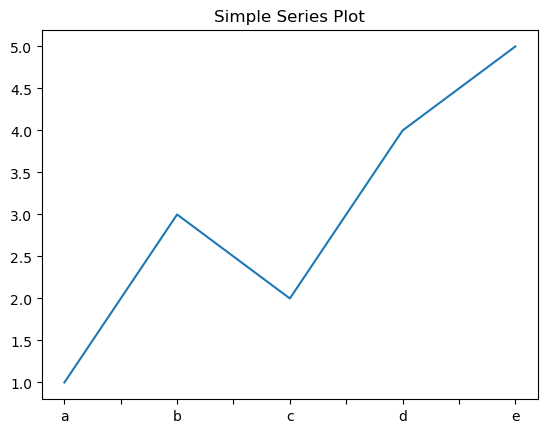

In [11]:
### Example: Series plot
s = pd.Series([1, 3, 2, 4, 5], index=["a","b","c","d","e"])
s.plot(kind="line", title="Simple Series Plot")

<Axes: title={'center': 'Value by Category'}, xlabel='Category'>

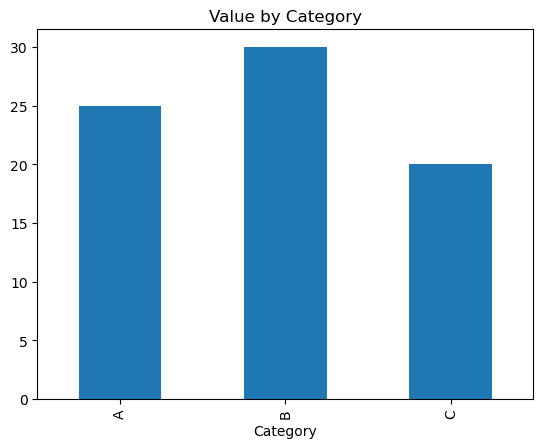

In [12]:
### Example: Grouped DataFrame plot
df = pd.DataFrame({
'Category': ['A','A','B','B','C','C'],
'Value': [10,15,10,20,5,15]
})

grouped = df.groupby('Category')['Value'].sum()
grouped.plot(kind="bar", title="Value by Category")



- Supported plot kinds: `line`, `bar`, `hist`, `box`, etc.
- Great for exploration, but for publication-quality graphics use dedicated libraries (Matplotlib, Seaborn, etc.).

<a id='inputoutput'></a>
### Input/Output
- Common file formats: CSV, FITS (or maybe ASDF), Parquet, SQL, JSON, etc. (**Please always use standards**)
  - `pd.read_csv()` is the most common entry point.
  - pandas does not read directly FITS files
    - one solution: [Table](https://docs.astropy.org/en/stable/io/unified_table_fits.html) method from astropy
- Always inspect results: `.head()`, `.info()`, `.dtypes`.
  - Even more: DataFrame *plot* method

(*) Note: we strongly recommend to use PARQUET files

<a id='large-data-considerations'></a>
### Large data considerations
- Strategies:
  - Use `chunksize` for incremental loading.
  - Load only needed columns.
- Alternatives:
  - **Dask DataFrame:** scales pandas to big data.
  - **[Polars](https://docs.pola.rs/):** modern, fast, Arrow-based library.

<a id='some-more-functions'></a>
### Some more functions
- [Looping a dataframe (iterrows)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html)
- [Sort method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)
- [sample method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)
- [Reshape dataframes (pivot, stack, unstack)](http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)
- Data cleaning:
    - [check for missing values (isnull)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)
    - [drop missing values (dropna)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
    - [fill the missing values with other values (fillna)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
    - [replace values with different values (replace)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)
